In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
df=pd.read_csv('/content/train.csv')

<ipython-input-2-a43e47edc79e>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/train.csv')


In [3]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
df["Annual_Income"] = pd.to_numeric(df["Annual_Income"], errors="coerce")

In [5]:
df["Num_of_Loan"] = pd.to_numeric(df["Num_of_Loan"], errors="coerce")

In [6]:
df["Num_of_Delayed_Payment"] = pd.to_numeric(df["Num_of_Delayed_Payment"], errors="coerce")

In [7]:
df["Changed_Credit_Limit"] = pd.to_numeric(df["Changed_Credit_Limit"], errors="coerce")

In [8]:
df["Outstanding_Debt"] = pd.to_numeric(df["Outstanding_Debt"], errors="coerce")

In [9]:
df["Num_of_Loan"] = pd.to_numeric(df["Num_of_Loan"], errors="coerce")

In [10]:
df["Amount_invested_monthly"] = pd.to_numeric(df["Amount_invested_monthly"], errors="coerce")

In [11]:
df["Monthly_Balance"] = pd.to_numeric(df["Monthly_Balance"], errors="coerce")

In [12]:
df=df.drop(columns=['ID','Age','Customer_ID','Name','Month','SSN','Occupation','Type_of_Loan','Credit_Utilization_Ratio','Credit_History_Age',])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Annual_Income            93020 non-null   float64
 1   Monthly_Inhand_Salary    84998 non-null   float64
 2   Num_Bank_Accounts        100000 non-null  int64  
 3   Num_Credit_Card          100000 non-null  int64  
 4   Interest_Rate            100000 non-null  int64  
 5   Num_of_Loan              95215 non-null   float64
 6   Delay_from_due_date      100000 non-null  int64  
 7   Num_of_Delayed_Payment   90254 non-null   float64
 8   Changed_Credit_Limit     97909 non-null   float64
 9   Num_Credit_Inquiries     98035 non-null   float64
 10  Credit_Mix               100000 non-null  object 
 11  Outstanding_Debt         98991 non-null   float64
 12  Payment_of_Min_Amount    100000 non-null  object 
 13  Total_EMI_per_month      100000 non-null  float64
 14  Amoun

In [14]:
object_cols=df.select_dtypes(include=['object'])
float_cols=df.select_dtypes(include=['float64'])
int_cols=df.select_dtypes(include=['int64'])

In [15]:
int_cols

,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date
0,3,4,3,3
1,3,4,3,-1
2,3,4,3,3
3,3,4,3,5
4,3,4,3,6
...,...,...,...,...
99995,4,6,7,23
99996,4,6,7,18
99997,4,6,5729,27
99998,4,6,7,20


In [16]:
float_cols

,Annual_Income,Monthly_Inhand_Salary,Num_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,19114.12,1824.843333,4.0,7.0,11.27,4.0,809.98,49.574949,80.415295,312.494089
1,19114.12,NaN,4.0,NaN,11.27,4.0,809.98,49.574949,118.280222,284.629162
2,19114.12,NaN,4.0,7.0,NaN,4.0,809.98,49.574949,81.699521,331.209863
3,19114.12,NaN,4.0,4.0,6.27,4.0,809.98,49.574949,199.458074,223.451310
4,19114.12,1824.843333,4.0,NaN,11.27,4.0,809.98,49.574949,41.420153,341.489231
...,...,...,...,...,...,...,...,...,...,...
99995,39628.99,3359.415833,2.0,7.0,11.50,3.0,502.38,35.104023,60.971333,479.866228
99996,39628.99,3359.415833,2.0,7.0,11.50,3.0,502.38,35.104023,54.185950,496.651610
99997,39628.99,3359.415833,2.0,6.0,11.50,3.0,502.38,35.104023,24.028477,516.809083
99998,39628.99,3359.415833,2.0,NaN,11.50,3.0,502.38,35.104023,251.672582,319.164979


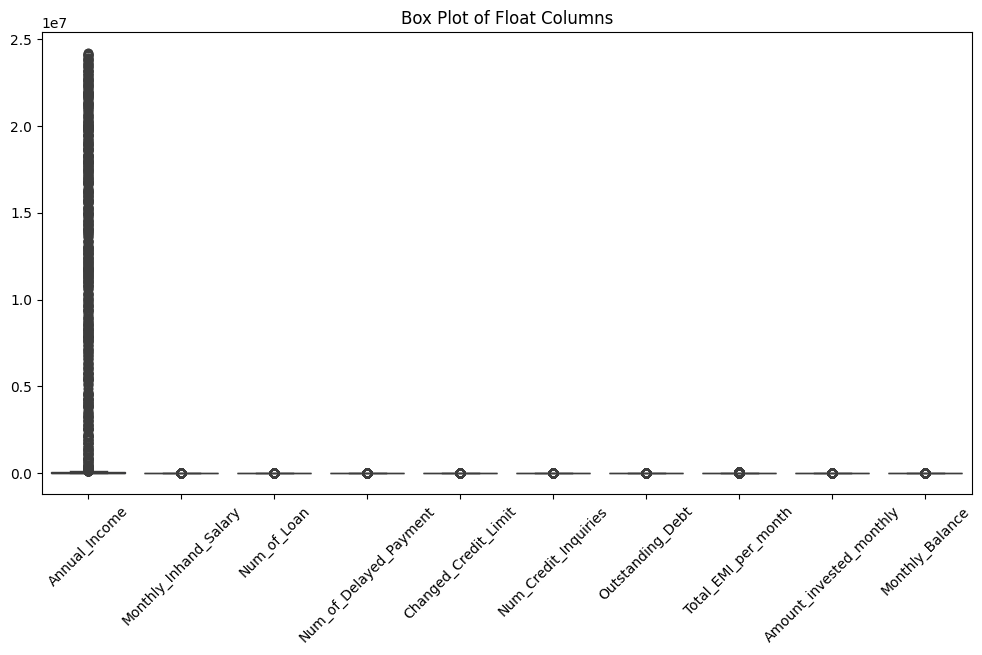

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot(data=float_cols)
plt.xticks(rotation=45)
plt.title("Box Plot of Float Columns")
plt.show()

In [18]:
outlier_counts = {}
for col in float_cols.columns:
    Q1 = float_cols[col].quantile(0.25)
    Q3 = float_cols[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((float_cols[col] < lower_bound) | (float_cols[col] > upper_bound)).sum()
    outlier_counts[col] = outliers

In [19]:
outlier_counts_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])
print(outlier_counts_df)

                         Outlier Count
Annual_Income                     2562
Monthly_Inhand_Salary             1683
Num_of_Loan                       4323
Num_of_Delayed_Payment             717
Changed_Credit_Limit               668
Num_Credit_Inquiries              1650
Outstanding_Debt                  5214
Total_EMI_per_month               6795
Amount_invested_monthly           7568
Monthly_Balance                   7627


In [20]:
def cap_outliers(df):
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

In [21]:
float_cols = cap_outliers(float_cols)

In [22]:
outlier_counts = {}
for col in float_cols.columns:
    Q1 = float_cols[col].quantile(0.25)
    Q3 = float_cols[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((float_cols[col] < lower_bound) | (float_cols[col] > upper_bound)).sum()
    outlier_counts[col] = outliers
    outlier_counts_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])
print(outlier_counts_df)

                         Outlier Count
Annual_Income                        0
Monthly_Inhand_Salary                0
Num_of_Loan                          0
Num_of_Delayed_Payment               0
Changed_Credit_Limit                 0
Num_Credit_Inquiries                 0
Outstanding_Debt                     0
Total_EMI_per_month                  0
Amount_invested_monthly              0
Monthly_Balance                      0


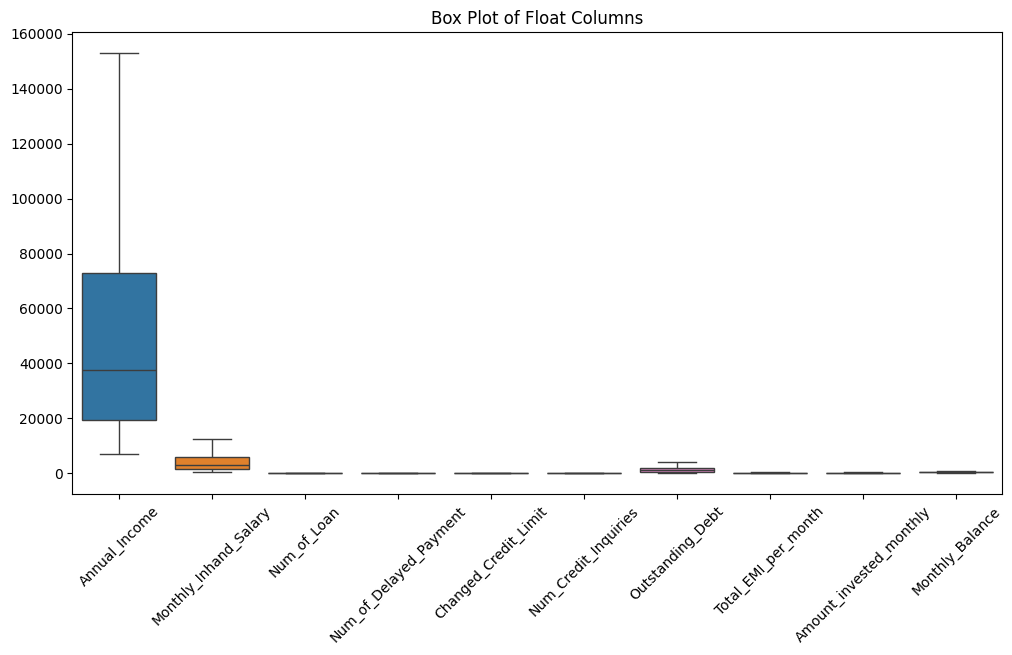

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=float_cols)
plt.xticks(rotation=45)
plt.title("Box Plot of Float Columns")
plt.show()

In [24]:
object_cols.isnull().sum()

,0
Credit_Mix,0
Payment_of_Min_Amount,0
Payment_Behaviour,0
Credit_Score,0


In [25]:
object_cols.fillna(object_cols.mode().iloc[0], inplace=True)

In [26]:
object_cols.isnull().sum()

,0
Credit_Mix,0
Payment_of_Min_Amount,0
Payment_Behaviour,0
Credit_Score,0


In [27]:
object_cols

,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,_,No,High_spent_Small_value_payments,Good
1,Good,No,Low_spent_Large_value_payments,Good
2,Good,No,Low_spent_Medium_value_payments,Good
3,Good,No,Low_spent_Small_value_payments,Good
4,Good,No,High_spent_Medium_value_payments,Good
...,...,...,...,...
99995,_,No,High_spent_Large_value_payments,Poor
99996,_,No,High_spent_Medium_value_payments,Poor
99997,Good,No,High_spent_Large_value_payments,Poor
99998,Good,No,Low_spent_Large_value_payments,Standard


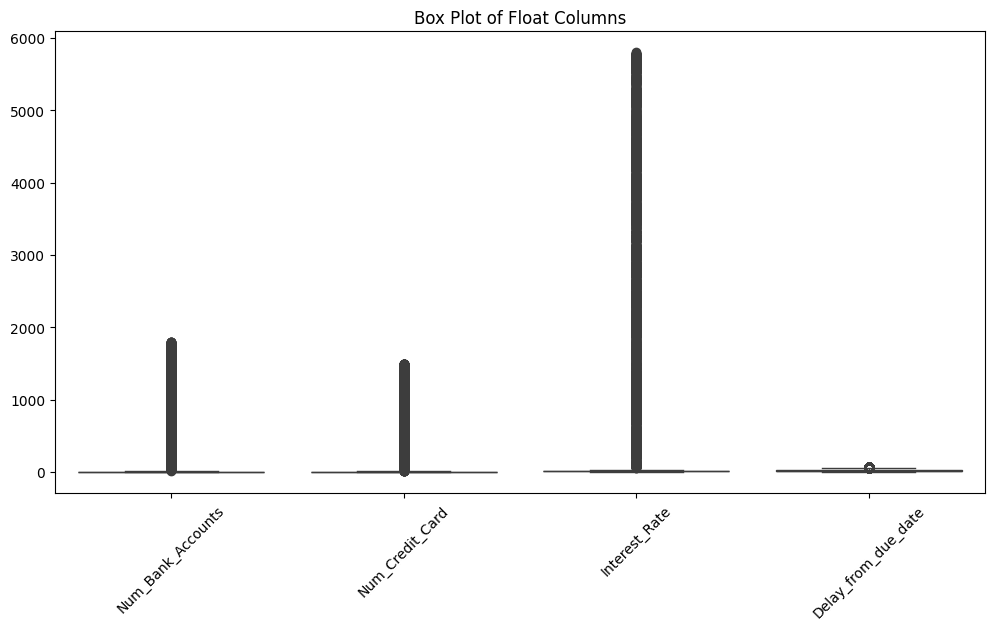

In [28]:
plt.figure(figsize=(12,6))
sns.boxplot(data=int_cols)
plt.xticks(rotation=45)
plt.title("Box Plot of int Columns")
plt.show()

In [29]:
outlier_counts = {}
for col in int_cols.columns:
    Q1 = int_cols[col].quantile(0.25)
    Q3 = int_cols[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((int_cols[col] < lower_bound) | (int_cols[col] > upper_bound)).sum()
    outlier_counts[col] = outliers
    outlier_counts_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])
print(outlier_counts_df)

                     Outlier Count
Num_Bank_Accounts             1315
Num_Credit_Card               2271
Interest_Rate                 2034
Delay_from_due_date           4002


In [30]:
int_cols = cap_outliers(int_cols)

In [31]:
outlier_counts = {}
for col in int_cols.columns:
    Q1 = int_cols[col].quantile(0.25)
    Q3 = int_cols[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((int_cols[col] < lower_bound) | (int_cols[col] > upper_bound)).sum()
    outlier_counts[col] = outliers
    outlier_counts_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])
print(outlier_counts_df)

                     Outlier Count
Num_Bank_Accounts                0
Num_Credit_Card                  0
Interest_Rate                    0
Delay_from_due_date              0


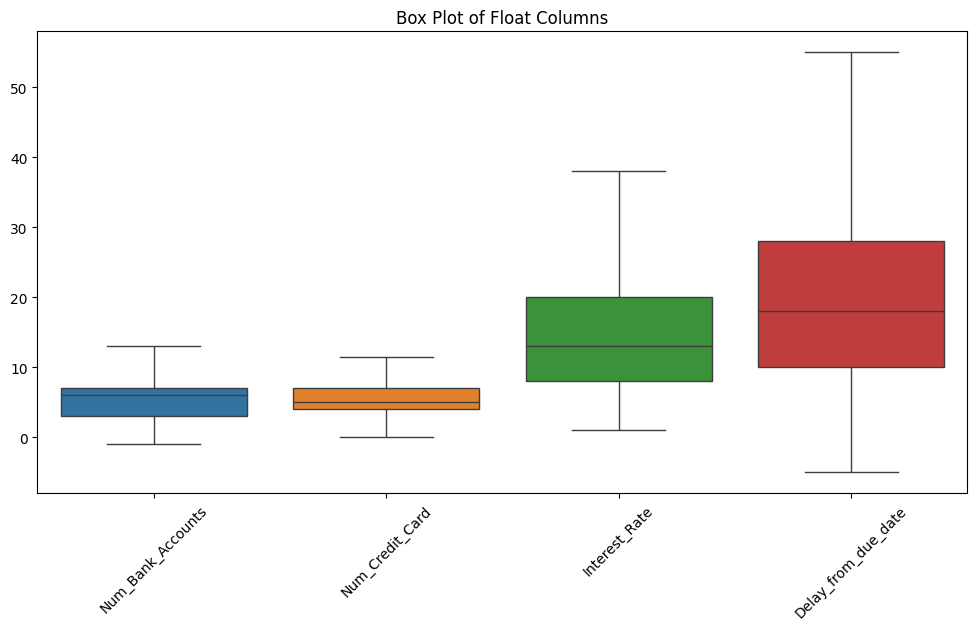

In [32]:
plt.figure(figsize=(12,6))
sns.boxplot(data=int_cols)
plt.xticks(rotation=45)
plt.title("Box Plot of int Columns")
plt.show()

In [38]:
float_cols.isnull().sum()

,0
Annual_Income,6980
Monthly_Inhand_Salary,15002
Num_of_Loan,4785
Num_of_Delayed_Payment,9746
Changed_Credit_Limit,2091
Num_Credit_Inquiries,1965
Outstanding_Debt,1009
Total_EMI_per_month,0
Amount_invested_monthly,8784
Monthly_Balance,1209


In [42]:
float_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Annual_Income            93020 non-null   float64
 1   Monthly_Inhand_Salary    84998 non-null   float64
 2   Num_of_Loan              95215 non-null   float64
 3   Num_of_Delayed_Payment   90254 non-null   float64
 4   Changed_Credit_Limit     97909 non-null   float64
 5   Num_Credit_Inquiries     98035 non-null   float64
 6   Outstanding_Debt         98991 non-null   float64
 7   Total_EMI_per_month      100000 non-null  float64
 8   Amount_invested_monthly  91216 non-null   float64
 9   Monthly_Balance          98791 non-null   float64
dtypes: float64(10)
memory usage: 7.6 MB


In [43]:
float_cols.fillna(float_cols.mean(), inplace=True)

In [44]:
float_cols.isnull().sum()

,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_of_Loan,0
Num_of_Delayed_Payment,0
Changed_Credit_Limit,0
Num_Credit_Inquiries,0
Outstanding_Debt,0
Total_EMI_per_month,0
Amount_invested_monthly,0
Monthly_Balance,0


In [45]:
int_cols.isnull().sum()

,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Delay_from_due_date,0


In [57]:
df = pd.concat([object_cols, float_cols,int_cols], axis=1)

In [58]:
df.isnull().sum()

,0
Credit_Mix,0
Payment_of_Min_Amount,0
Payment_Behaviour,0
Credit_Score,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_of_Loan,0
Num_of_Delayed_Payment,0
Changed_Credit_Limit,0
Num_Credit_Inquiries,0


In [ ]:
x=df[['Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour','Annual_Income','Monthly_Inhand_Salary','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Interest_Rate']]
y=df[['Credit_Score']]